In [51]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import datetime
import sys
from src.shared import weights_path, data_path, gen_train_val, data_transforms, should_print

is_local = len(sys.argv) == 2 and sys.argv[1] == 'local'
NUM_EPOCHS = 100
BATCH_SIZE = 8

# Load smaller labeled set (CUB 200 2010)
labeled_dataset_name = "CUB_200"
labeled_data_dir = f"datasets/{labeled_dataset_name}"

In [52]:
from randaugment import RandAugment, ImageNetPolicy
dataset = datasets.ImageFolder(labeled_data_dir, transform=transforms.Compose(
                        [
                            RandAugment(),
                            transforms.RandomResizedCrop(224),
                            transforms.RandomHorizontalFlip(),
                            transforms.ToTensor(),
                            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),                        
    ])
)
class_names = dataset.classes

loader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

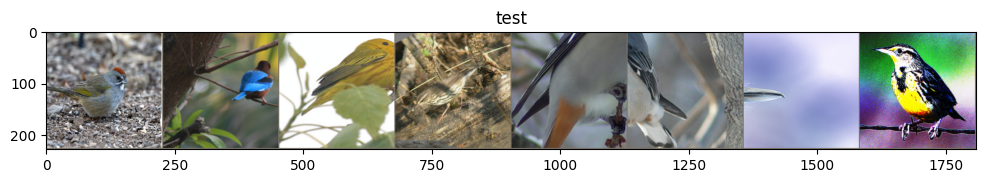

In [55]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(loader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title="test")